In [ ]:
"""
Algoritma: 

* İlk olarak tüm düğümleri ziyaret edilmemiş olarak işaretleyin. 
* Bir kaynak düğüm (source node) belirleyin ve kaynak düğüme 0 uzaklık mesafesi ve diğer tüm düğümlere sonsuz uzaklık mesafesi değerlerini atayın.
* Kaynak düğümü şuanki (current) düğüm olarak belirleyin. 
* Şuanki düğümün tüm ziyaret edilmemiş komşularına bakın ve bu komşuların mevcut düğüme olan 'Tentative Distance' 
  (geçici uzaklık) değerlerini bulunuz. (Tentative Distance = distance of current + weight of the corresponding edge).
|
--> Hesapladığınız bu değeri mevcut değerle karşılaştırın (Mevcut değer sonsuz da olabilir.). Bu değerlerden küçük
    olanını yeni değer olarak atayın.
* Mevcut düğümü tüm ziyaret edilmemiş komşularıyla kıyasladıktan sonra mevcut düğümü ziyaret edilmiş olarak işaretle 
  ve ziyaret edilmemiş düğümler listesinden çıkar.
* Bu adımları ziyaret edilmemiş düğüm kalmayana kadar tekrar et. 

"""

In [1]:
# Aşağıda bulunan kaynak kodların oluşturulmasında GeeksforGeeks Sitesi'nden yararlanılmıştır.
# Referans: https://www.geeksforgeeks.org/shortest-path-in-a-directed-graph-by-dijkstras-algorithm/

# Networkx kütüphanesi graf çizimi için kullanıldı.
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.pyplot import figure

In [2]:
# Bu kısımda verdiğimiz örneğe ait komşuluk matrisini gösterdik. (Directed Graph)
"""
                    Eskişehir Sivas Konya Denizli Niğde Mersin  Antalya Kayseri
        Eskişehir       0       10    0     0       0     0       0       0
        Sivas           0       0     0     0       10    40      0       0
        Konya           20      0     0     0       0     80      90      0
        Denizli         50      0     0     0       0     0       30      0
        Niğde           0       50    0     0       0     10      0       20  
        Mersin          0       0     0     0       10    0       20      0
        Antalya         0       0     20    0       0     0       0       0
        Kayseri         0       0     0     0       0     0       0       0
"""

# Bu kısımda örneğe ait komşuluk matirisini Numpy Array olarak tanımladık.
A = np.array([[0, 10, 0, 0, 0, 0, 0, 0], 
              [0, 0, 0, 0, 10, 40, 0, 0],
              [20, 0, 0, 0, 0, 80, 90, 0],
              [50, 0, 0, 0, 0, 0, 30, 0],
              [0, 50, 0, 0, 0, 10, 0, 20],
              [0, 0, 0, 0, 10, 0, 20, 0],
              [0, 0, 20, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0]])

# Networkx kütüphanesi ve yukarıda tanımlanan Numpy Array kullanılarak Directed Graph oluşturuldu.
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)

# Oluşturulan graf üzerindeki düğümlere şehir isimleri atandı.
mapping = {0:'Eskisehir',
           1:'Sivas',
           2:'Konya',
           3:'Denizli',
           4:'Nigde',
           5:'Mersin',
           6:'Antalya',
           7:'Kayseri'}

G = nx.relabel_nodes(G, mapping)


Edge Labels:  {('Eskisehir', 'Sivas'): 10, ('Sivas', 'Nigde'): 10, ('Sivas', 'Mersin'): 40, ('Konya', 'Eskisehir'): 20, ('Konya', 'Mersin'): 80, ('Konya', 'Antalya'): 90, ('Denizli', 'Eskisehir'): 50, ('Denizli', 'Antalya'): 30, ('Nigde', 'Sivas'): 50, ('Nigde', 'Mersin'): 10, ('Nigde', 'Kayseri'): 20, ('Mersin', 'Nigde'): 10, ('Mersin', 'Antalya'): 20, ('Antalya', 'Konya'): 20}

Graph Visualization: 


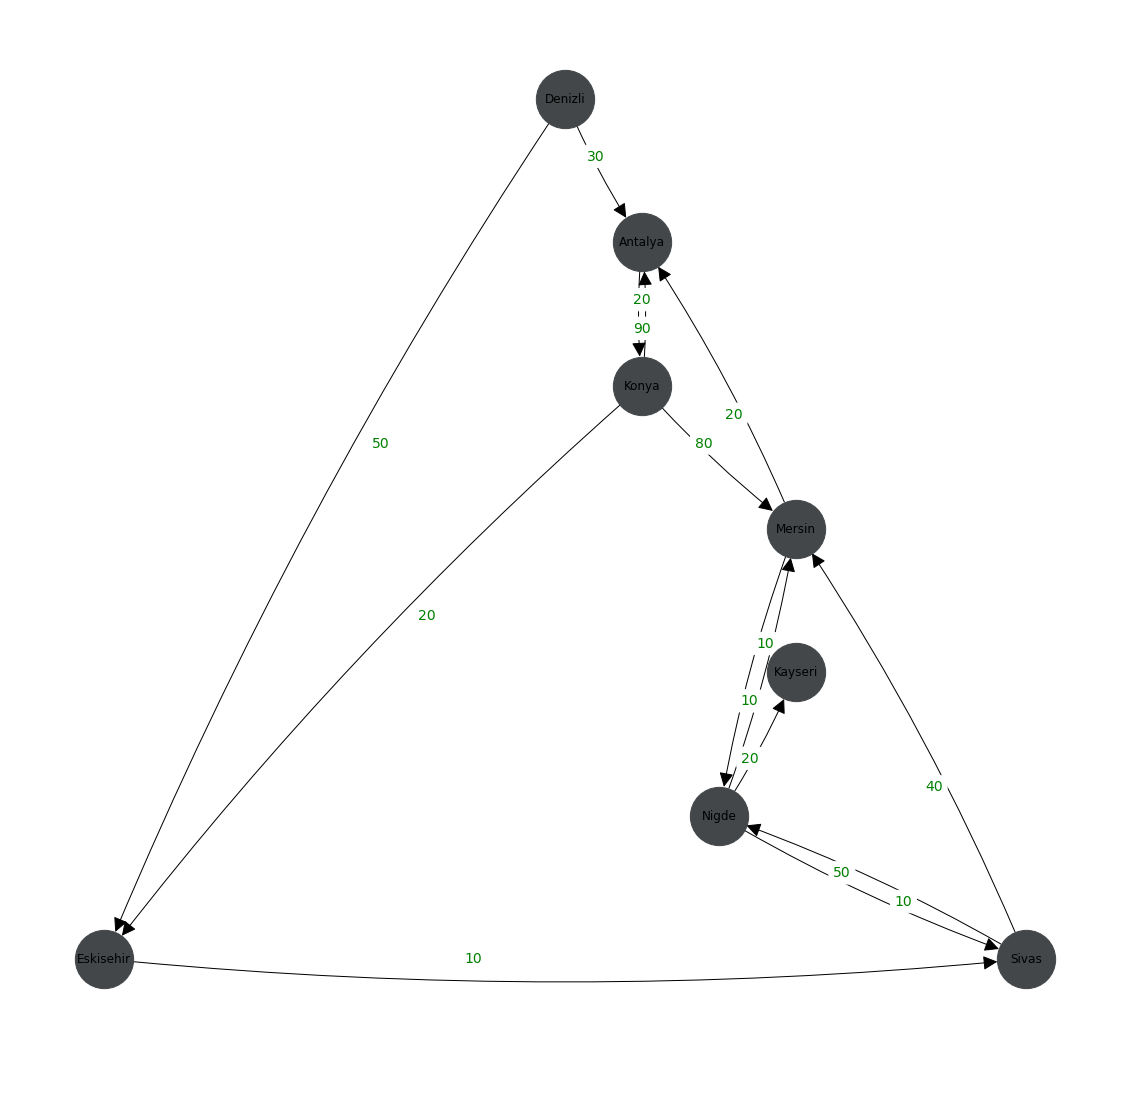

In [3]:
# Gösterilecek şeklin boyut ayarlaması yapıldı.
plt.figure(figsize=(20,20))

# Graf üzerinde bulunan düğümler ve bu düğümler arasındaki ağırlıklar bir dictionary
# yapısı üzerine kaydedildi.
edge_labels = dict([((u,v), round(d['weight'], 3))
             for u,v,d in G.edges(data=True)])

print("\nEdge Labels: ", edge_labels)

# Düğümlerin düzlem üzerinde nasıl konumlandırılacağı belirtildi.
pos = nx.planar_layout(G)

# Kenarların ağırlıkları ekrana yazdırıldı.
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels=edge_labels,
                             label_pos=0.60, font_size=14, font_color = 'g', rotate = False)

# Graf ekrana bastırıldı.
print("\nGraph Visualization: ")
nx.draw(G, pos, with_labels=True,
        connectionstyle='arc3, rad=0.05',
        node_color='#43474a', node_size = 3400, arrowsize = 30)

plt.show()



In [4]:
# Bu kısımdan itibaren Dijkstra Algoritmasına ait kodlar bulunmaktadır.

# Bu sınıf herhangi bir düğüm objesine o düğüme ait bağlantıları eklerken kullanılır.
# Bir düğüme bir bağlantı eklerken Pair sınıfından bir nesne oluşturulur ve bu nesne
# o düğümün hangi düğümle bağlantılı olduğunu ve aradaki bağlantının ağırlık bilgisini 
# kaydeder.
class Pair:
    def __init__(self, target_node_number, weight):
        self.target_node_number = target_node_number
        self.weight = weight
maxNumber = 1000000000;

In [6]:
# Graf üzerindeki düğümlerin belirtildiği sınıftır.
class Node:
   
    # 'current_node_number' bulunduğumuz düğümün id değerini belirtir.
    # 'connections' dizisi düğümün bağlantılarını kaydeder.   
    def __init__(self, current_node_number):       
        self.current_node_number = current_node_number
        self.connections = []
   
    # 'add_connection' fonksiyonu parametre olarak hedef düğümün id değerini ve bu 
    # hedef düğüme olan uzaklık değerlerini almaktadır. Daha sonrasında ise Pair 
    # sınıfından bir obje yaratmaktadır ve bu objeyi 'connections' isimli diziye
    # kaydetmektedir.
    def add_connection(self, target_node_number, weight):   
        p = Pair(target_node_number, weight);
        self.connections.append(p);

In [7]:
def dijkstra(graph, s, path):
       
    # Bu satırda 'distance' isminde bir array oluşturuyoruz ve bu arrayin uzunluğu
    # düğüm sayısı kadardır. Bu arrayin tüm elemanlarının ilk değerini sonsuz olarak
    # belirliyoruz. Bu dizi iki düğüm arasındaki kenarın ağırlıklarını belirtmek 
    # için kullanılıyor.
    distance = [maxNumber for i in range(len(graph))]
   
    # Bu satırda 'visited' isminde bir array oluşturuyoruz ve bu arrayin uzunluğu
    # düğüm sayısı kadardır. Bu arrayin tüm elemanlarının ilk değerini 'False' olarak
    # belirliyoruz. Bu dizi daha önceden o düğümün ziyaret edilip edilmediğinin
    # kontrolünü gerçekleştirmek amacıyla kullanılmaktadır.
    visited = [False for i in range(len(graph))]
     
    # Bu satırda ise fonksiyona parametre olarak geçilen 'path' isimli dizinin ilk değerlerini
    # -1 olarak tanımlıyoruz. Bu -1 değeri daha önce bu yolun kullanılmadığını belirtmek amacıyla
    # kullanılmaktadır.
    for i in range(len(graph)):       
        path[i] = -1

    distance[s] = 0;
    path[s] = -1;
    current = s;
   
    # Set of vertices that has
    # a parent (one or more)
    # marked as visited
    sett = set()    
    while (True):
           
        # Mevcut düğümü (üzerinde bulunduğumuz düğümü) ziyaret edildi olarak işaretliyoruz.
        visited[current] = True;

        # Buradaki döngünün uzunluğu mevcut düğümün bağlantı sayısı (komşu sayısı) kadardır.
        for i in range(len(graph[current].connections)):
            # Burada mevcut düğümün komşularına tek tek erişilir. Eğer erişilen bu komşu daha 
            # önce ziyaret edilmişse döngü 'continue' ile devam eder. 
            v = graph[current].connections[i].target_node_number;           
            if (visited[v]):
                continue;
   
            # Eğer komşu daha önce ziyaret edilmemişse bu komşu 'sett' isimli kümeye eklenir.
            sett.add(v);
            # Algoritmada bahsedilen Tentative Distance bu kısımda hesaplanır. Yani daha önceki yol
            # uzunluğuna mevcut düğümle arasındaki ağırlığın eklenmesi işlemidir.
            alt = distance[current] + graph[current].connections[i].weight;
   
            # Hesaplanan bu Tentative Distance daha önceki mesafe değerinden küçükse
            # daha önceki değer yerine bu yeni değer eklenir. Ve bu nokta en kısa yol
            # olduğu için 'path' isimli dizide de belirtilir.
            if (alt < distance[v]):      
                distance[v] = alt;
                path[v] = current;   

        # Döngü tamamlandıktan sonra mevcut düğüm eğer 'sett' isimli kümede bulunuyorsa
        # bu kümeden çıkarılır.
        if current in sett:           
            sett.remove(current);       
        if (len(sett) == 0):
            break;
   
        # The new current
        minimum_distance = maxNumber;
        index = 0;
   
        # Loop to update the distance
        # of the vertices of the graph
        for a in sett:       
            if (distance[a] < minimum_distance):          
                minimum_distance = distance[a];
                index = a;          
        current = index;  


    return distance;

In [8]:
def printPath(path, i, s):
    if (i != s):
           
        # Condition to check if
        # there is no path between
        # the vertices
        if (path[i] == -1):       
            print("Path not found!!");
            return;       
        printPath(path, path[i], s);
        print(list(G.nodes)[path[i]] + " --> ");

In [11]:
G_II = nx.from_numpy_matrix(A, create_using=nx.DiGraph)

v = [] # Düğüm listesi
n = G_II.number_of_nodes() # Düğüm sayısı 
number_of_edges = G_II.number_of_edges() # Kenar sayısı
start_node = 0; # Başlangıç düğümü (Kaynak düğümü)

node_list = G_II.nodes # Düğüm listesi
edge_list = dict([((u,v), round(d['weight'], 3))
             for u,v,d in G_II.edges(data=True)]) # Kenar ve ağırlık listesi

print("Nodes in the graph:", node_list)
print("Nodes in the graph:", list(G.nodes))

print("\nEdges in the graph:", edge_list)
print("Edges in the graph:", edge_labels)


print("\nNumber of nodes in the graph:", n)
print("Number of edges in the graph:", number_of_edges)

print("\n--------------------------------------------------")


# Burada tüm düğümler oluşturulup 'v' isimli düğüm listesine eklenir.
for i in range(n):
    a = Node(i);
    v.append(a);

# Burada ise tüm düğümlerin bağlantıları oluşturulup düğümlere eklenir.
for source_target_pair in edge_list:
  source_node = source_target_pair[0]
  target_node = source_target_pair[1]
  weight = edge_list[source_target_pair]

  v[source_node].add_connection(target_node, weight);

path = [0 for i in range(len(v))];
dist = dijkstra(v, start_node, path);

# Düğümler arasındaki en kısa mesafe burada ekrana bastırılır.
for i in range(len(dist)):
    if (dist[i] == maxNumber):
      
        print("\n" + list(G.nodes)[i] + " ve " + list(G.nodes)[start_node] + " noktaları birbirine bağlı değildir!")
        continue;       
    print("\n{} düğümünden {} düğümüne en kısa mesafe: {}".format(
                      list(G.nodes)[start_node], list(G.nodes)[i], dist[i]));
    printPath(path, i, start_node)
    


Nodes in the graph: [0, 1, 2, 3, 4, 5, 6, 7]
Nodes in the graph: ['Eskisehir', 'Sivas', 'Konya', 'Denizli', 'Nigde', 'Mersin', 'Antalya', 'Kayseri']

Edges in the graph: {(0, 1): 10, (1, 4): 10, (1, 5): 40, (2, 0): 20, (2, 5): 80, (2, 6): 90, (3, 0): 50, (3, 6): 30, (4, 1): 50, (4, 5): 10, (4, 7): 20, (5, 4): 10, (5, 6): 20, (6, 2): 20}
Edges in the graph: {('Eskisehir', 'Sivas'): 10, ('Sivas', 'Nigde'): 10, ('Sivas', 'Mersin'): 40, ('Konya', 'Eskisehir'): 20, ('Konya', 'Mersin'): 80, ('Konya', 'Antalya'): 90, ('Denizli', 'Eskisehir'): 50, ('Denizli', 'Antalya'): 30, ('Nigde', 'Sivas'): 50, ('Nigde', 'Mersin'): 10, ('Nigde', 'Kayseri'): 20, ('Mersin', 'Nigde'): 10, ('Mersin', 'Antalya'): 20, ('Antalya', 'Konya'): 20}

Number of nodes in the graph: 8
Number of edges in the graph: 14

--------------------------------------------------

Eskisehir düğümünden Eskisehir düğümüne en kısa mesafe: 0

Eskisehir düğümünden Sivas düğümüne en kısa mesafe: 10
Eskisehir --> 

Eskisehir düğümünden Kon